In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import math
import scipy.stats as st
import statsmodels.api as sm

from datetime import datetime
from IPython.display import display
import warnings
pd.set_option("display.max_rows", None)



In [2]:
customers = pd.read_csv("customers.csv")

print(customers.describe(include="all"))
print(customers.isnull().values.any()) 
customers.head()

       client_id   sex        birth
count       8623  8623  8623.000000
unique      8623     2          NaN
top       c_1115     f          NaN
freq           1  4491          NaN
mean         NaN   NaN  1978.280877
std          NaN   NaN    16.919535
min          NaN   NaN  1929.000000
25%          NaN   NaN  1966.000000
50%          NaN   NaN  1979.000000
75%          NaN   NaN  1992.000000
max          NaN   NaN  2004.000000
False


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


#### 3266 unique id_prod    vs  3287 in products
#### 8602 unique client_id    vs  8623 in customers
#### 336855 unique vs 337016  date   --- not a prob, real prob is related to date but not at this point


In [3]:
products= pd.read_csv("products.csv")
print(products.describe(include="all"))
print(products.isnull().values.any()) 
print(products.info())
products.sort_values(by= 'price', ascending= True).head()

       id_prod        price        categ
count     3287  3287.000000  3287.000000
unique    3287          NaN          NaN
top      0_910          NaN          NaN
freq         1          NaN          NaN
mean       NaN    21.856641     0.370246
std        NaN    29.847908     0.615387
min        NaN    -1.000000     0.000000
25%        NaN     6.990000     0.000000
50%        NaN    13.060000     0.000000
75%        NaN    22.990000     1.000000
max        NaN   300.000000     2.000000
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None


,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0


#### Remark: the product with id_prod = T_0 has its price negative,  to clean 

In [4]:
products = products[products.id_prod != "T_0"]
print(products.info())
products.sort_values(by= 'price', ascending= True).head()

# the product with negative price is droped from the dataframe 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB
None


,id_prod,price,categ
2272,0_528,0.62,0
2355,0_202,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
1530,0_1620,0.80,0


In [5]:
# price in array of products categ 0 
price0 = products.loc[products['categ']== 0 , 'price' ].values
price0 

array([19.99,  5.13, 17.99, ..., 17.14, 11.22, 25.16])

In [6]:
import statistics 

print("Average price for products in categ 0:", round(statistics.mean(price0),2))
print("Median price for products in categ 0:", round(statistics.median(price0),2))
print("Mode of price for products in categ 0:", statistics.mode(price0))

Average price for products in categ 0: 11.73
Median price for products in categ 0: 10.32
Mode of price for products in categ 0: 4.99


/Users/ZoeyZhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


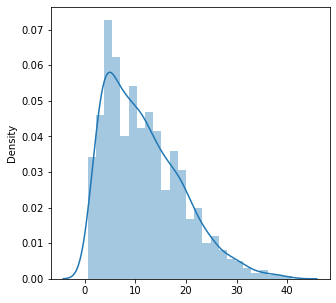

In [7]:
fig,ax = plt.subplots(figsize=(5,5))
sns.distplot(price0)
plt.savefig('pricecateg0.jpg')
# median is better in this case 
# the distribution is unimodale and is quite right-skewed, and with the high-peak, thus it's reasonable to choose mean and/or median as the value to impute the nulls 

In [8]:
nullvalue = products.loc[products['id_prod'] == '0_2245']
nullvalue


,id_prod,price,categ


##### => there is NOT a product with id_prod = 0_2245, but it's sure that it is in categ 0. thus need to decide among mean/mode/median, which to use in categ 0

In [9]:
transactions= pd.read_csv("transactions.csv")
print(transactions.describe(include="all"), sep='\n')
print(products.isnull().values.any()) 
print(transactions.info())
transactions.head()

       id_prod                             date session_id client_id
count   337016                           337016     337016    337016
unique    3266                           336855     169195      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      1081                               13        200     12855
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB
None


,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


####  Select all duplicate rows based on values of [date] column

In [10]:


date_duplicate = transactions[transactions.duplicated(['date'])]

print(date_duplicate.describe(include="all"))

print("Duplicate rows based on the column 'date' are:")
date_duplicate.head()




       id_prod                             date session_id client_id
count      161                              161        161       161
unique       1                               37          1         2
top        T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0
freq       161                               12        161        84
Duplicate rows based on the column 'date' are:


,id_prod,date,session_id,client_id
27161,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_0
34387,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
48425,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
54813,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
56373,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0


 it's clear that  all these duplicated rows have some points in common: id_prod = T_0, date started by 'test_',  session_id = 's=0'


#### To drop duplicate rows in [date] column

In [11]:
transac=transactions[transactions.id_prod != "T_0"]
print(transac.describe())
transac.head()

transac2 = transac[transac.session_id != "s_0"]
print(transac2.describe())

# => no difference in case we deduplicate by id_prod or by session_id

transac.head()

       id_prod                        date session_id client_id
count   336816                      336816     336816    336816
unique    3265                      336816     169194      8600
top      1_369  2021-04-19 15:10:35.016717   s_118668    c_1609
freq      1081                           1         14     12855
       id_prod                        date session_id client_id
count   336816                      336816     336816    336816
unique    3265                      336816     169194      8600
top      1_369  2021-04-19 15:10:35.016717   s_118668    c_1609
freq      1081                           1         14     12855


,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [12]:
trans_cus = pd.merge(transac, customers, on='client_id', how='left')

print(trans_cus.describe(include="all"))
trans_cus.info()
trans_cus.head() 


       id_prod                        date session_id client_id     sex  \
count   336816                      336816     336816    336816  336816   
unique    3265                      336816     169194      8600       2   
top      1_369  2021-04-19 15:10:35.016717   s_118668    c_1609       m   
freq      1081                           1         14     12855  169241   
mean       NaN                         NaN        NaN       NaN     NaN   
std        NaN                         NaN        NaN       NaN     NaN   
min        NaN                         NaN        NaN       NaN     NaN   
25%        NaN                         NaN        NaN       NaN     NaN   
50%        NaN                         NaN        NaN       NaN     NaN   
75%        NaN                         NaN        NaN       NaN     NaN   
max        NaN                         NaN        NaN       NaN     NaN   

                birth  
count   336816.000000  
unique            NaN  
top               NaN  
fre

,id_prod,date,session_id,client_id,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980


In [13]:
trans_prod = pd.merge(transac, products, on='id_prod', how='left')
print(trans_prod.info())
trans_prod.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336816 non-null  object 
 1   date        336816 non-null  object 
 2   session_id  336816 non-null  object 
 3   client_id   336816 non-null  object 
 4   price       336713 non-null  float64
 5   categ       336713 non-null  float64
dtypes: float64(2), object(4)
memory usage: 18.0+ MB
None


,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0


#### price, categ: 336816-336713 = 103 

#### to merge dataframes into one main dataframe "trans_prod_cus" via primary keys


In [14]:
trans_prod_cus = pd.merge(trans_prod, trans_cus, on = ['date', 'id_prod', 'session_id', 'client_id'])
print(trans_prod_cus.info())
trans_prod_cus.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336816 non-null  object 
 1   date        336816 non-null  object 
 2   session_id  336816 non-null  object 
 3   client_id   336816 non-null  object 
 4   price       336713 non-null  float64
 5   categ       336713 non-null  float64
 6   sex         336816 non-null  object 
 7   birth       336816 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 23.1+ MB
None


,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980


#### in price and categ: 336816 - 336713 non-null  = 103 NaN  : Done before 3 df were merged into trans_prod_cus 


In [15]:
#convert the date and birth columns from object into datetime

trans_prod_cus['date'] = pd.to_datetime(trans_prod_cus.date)
trans_prod_cus['birth'] = pd.to_datetime(trans_prod_cus['birth'], format = '%Y', errors ='coerce')

print(trans_prod_cus.info())
trans_prod_cus.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336816 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336816 non-null  object        
 3   client_id   336816 non-null  object        
 4   price       336713 non-null  float64       
 5   categ       336713 non-null  float64       
 6   sex         336816 non-null  object        
 7   birth       336816 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 23.1+ MB
None


,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977-01-01
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000-01-01
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979-01-01
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963-01-01
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980-01-01


In [16]:
from datetime import datetime
from datetime import date

now = datetime.now()    # current date and time
year = now.strftime("%Y")
print("year:", year)

def calculate_age(birth):      # create a function to calculate age based on birth 
    today = date.today()
    return today.year - birth.year - ((today.month, today.day) < (birth.month, birth.day))

trans_prod_cus['age'] = trans_prod_cus['birth'].apply(calculate_age)    # column 'age' created
trans_prod_cus.head()


year: 2021


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977-01-01,44
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000-01-01,21
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979-01-01,42
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963-01-01,58
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980-01-01,41


In [17]:
trans_prod_cus['year-month-day'] = pd.to_datetime(trans_prod_cus ['date']).dt.date
trans_prod_cus['year'] = pd.to_datetime(trans_prod_cus ['date']).dt.year
trans_prod_cus['month'] = pd.to_datetime(trans_prod_cus ['date']).dt.month
trans_prod_cus["period"] = trans_prod_cus["year"].astype(str)  + trans_prod_cus["month"].astype(str)
trans_prod_cus["period"] = pd.to_numeric(trans_prod_cus["period"])

print(trans_prod_cus.info())
print(trans_prod_cus.isnull().values.any()) 
trans_prod_cus.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_prod         336816 non-null  object        
 1   date            336816 non-null  datetime64[ns]
 2   session_id      336816 non-null  object        
 3   client_id       336816 non-null  object        
 4   price           336713 non-null  float64       
 5   categ           336713 non-null  float64       
 6   sex             336816 non-null  object        
 7   birth           336816 non-null  datetime64[ns]
 8   age             336816 non-null  int64         
 9   year-month-day  336816 non-null  object        
 10  year            336816 non-null  int64         
 11  month           336816 non-null  int64         
 12  period          336816 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(5)
memory usage: 36.0+ MB
None
True


,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year-month-day,year,month,period
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977-01-01,44,2021-04-10,2021,4,20214
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000-01-01,21,2022-02-03,2022,2,20222
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979-01-01,42,2021-09-23,2021,9,20219
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963-01-01,58,2021-10-17,2021,10,202110
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980-01-01,41,2021-07-17,2021,7,20217


- create columns: [year-month-day], [year], [month], [period] 
- there're NaN in this dataframe. to be precise, in [price] and [categ] columns (seperately 103 NaN) 

In [18]:
print("the number of NaN in price column is:",  trans_prod_cus['price'].isnull().sum().sum())
print("the number of NaN in categ column is:", trans_prod_cus['categ'].isnull().sum().sum())

the number of NaN in price column is: 103
the number of NaN in categ column is: 103


In [19]:
pricenull = pd.isnull(trans_prod_cus['price'])
categnull = pd.isnull(trans_prod_cus['categ'])
print(trans_prod_cus[pricenull].shape)
print(trans_prod_cus[categnull].shape)


(103, 13)
(103, 13)


##### => then we find that the product with price and categ = NaN is product 0_2245.
##### given the id_prod starts always by the product categ, we can identify that product 0_2245 has categ 0. 

In [20]:
trans_prod_cus[pricenull].head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year-month-day,year,month,period
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972-01-01,49,2021-06-17,2021,6,20216
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN,m,1973-01-01,48,2021-06-16,2021,6,20216
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN,f,1975-01-01,46,2021-11-24,2021,11,202111
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN,f,1982-01-01,39,2022-02-28,2022,2,20222
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN,m,1988-01-01,33,2021-03-01,2021,3,20213


### Traitement des données manquantes: imputation 


In [21]:

# to fill NaN in trans_prod_cus

trans_prod_cus.loc[trans_prod_cus['id_prod'] == "0_2245", ['price'] ] =  trans_prod_cus['price'].fillna(10.32)
trans_prod_cus.loc[trans_prod_cus['id_prod'] == "0_2245", ['categ'] ] =  trans_prod_cus['categ'].fillna(0)

print('after fillna, the number of null values in dataframe is:', trans_prod_cus.isnull().sum().sum())
trans_prod_cus.head()

after fillna, the number of null values in dataframe is: 0


,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year-month-day,year,month,period
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977-01-01,44,2021-04-10,2021,4,20214
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000-01-01,21,2022-02-03,2022,2,20222
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979-01-01,42,2021-09-23,2021,9,20219
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963-01-01,58,2021-10-17,2021,10,202110
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980-01-01,41,2021-07-17,2021,7,20217


#### Maintenant que le dataframe constitué, les données aberrantes nettoyées et les données manquantes imputées, on peut aller analyser les données de différentes variables de ce nouveau dataframe trans_prod_cus